# Files & Exception Handling Assignment

---
## I. Theoretical Questions 

---
### 1. What is the difference between interpreted and compiled languages? 

The difference between interpreted and compiled languages lies in how code is translated and executed by the computer.

| Feature                  | Compiled Languages                                             | Interpreted Languages                                |
| ------------------------ | -------------------------------------------------------------- | ---------------------------------------------------- |
| **Translation**          | Entire code is compiled into machine code **before execution** | Code is translated **line-by-line during execution** |
| **Output**               | Generates an **executable file** (e.g., `.exe`)                | **No separate executable**, runs through interpreter |
| **Speed**                | Generally **faster** due to prior compilation                  | Generally **slower** due to real-time interpretation |
| **Error Detection**      | Errors are found **at compile-time**                           | Errors are found **at runtime**                      |
| **Development Cycle**    | **Longer** (compile before running)                            | **Faster** (run directly)                            |
| **Portability**          | Less portable (platform-specific binaries)                     | More portable (requires interpreter only)            |
| **Flexibility/Dynamism** | Less flexible, mostly static typing                            | More flexible, supports dynamic typing               |
| **Examples**             | C, C++, Go, Rust                                               | Python, JavaScript, Ruby, PHP                        |
| **Tool Required**        | **Compiler** (e.g., GCC, Clang)                                | **Interpreter** (e.g., Python interpreter)           |

---
### 2. What is exception handling in Python? 

**Exception handling in Python** is a mechanism to gracefully handle **errors or unexpected events** during program execution without crashing the entire program.

#### Why use exception handling?

To prevent the program from terminating unexpectedly and to provide a way to **respond to runtime errors** (e.g., division by zero, file not found, invalid input, etc.)

#### Basic Syntax

```python
try:
    # Code that might raise an exception
    risky_operation()
except SomeException:
    # Code that runs if an exception occurs
    print("An error occurred.")
else:
    # Runs if no exception occurs
    print("No error occurred.")
finally:
    # Always runs, no matter what
    print("Cleaning up.")
```

#### Example:

```python
try:
    num = int(input("Enter a number: "))
    result = 10 / num
    print("Result is", result)
except ZeroDivisionError:
    print("You can't divide by zero!")
except ValueError:
    print("That's not a valid number.")
finally:
    print("Done with exception handling.")
```

**Common Exception Types**:

| Exception Type      | Triggered When...                                |
| ------------------- | ------------------------------------------------ |
| `ZeroDivisionError` | Division by zero                                 |
| `ValueError`        | Invalid value (e.g., letters instead of numbers) |
| `FileNotFoundError` | File does not exist                              |
| `TypeError`         | Operation on incompatible types                  |
| `IndexError`        | Accessing invalid index in a list                |
| `KeyError`          | Accessing invalid key in a dictionary            |

---
### 3. What is the purpose of the finally block in exception handling?

The **`finally` block** in Python's exception handling is used to define **clean-up actions** that must be executed **regardless of whether an exception occurred or not**.

**Purpose of the `finally` block:**

* To ensure that **important code always runs**, such as:

  * Closing files or database connections
  * Releasing resources (memory, locks, etc.)
  * Logging or notifying errors
* Acts like a **safety net** that executes no matter what

#### Syntax:

```python
try:
    # Code that may raise an exception
    risky_code()
except SomeException:
    # Handle exception
    print("Handled exception")
finally:
    # Always executed
    print("This will always run")
```

#### Example:

```python
try:
    file = open("data.txt", "r")
    data = file.read()
except FileNotFoundError:
    print("File not found!")
finally:
    print("Closing file...")
    try:
        file.close()
    except:
        pass
```

Even if the file isn’t found, the `finally` block will still run and try to close the file (if it exists).

#### 🔍 Key Points:

* The `finally` block **always executes** after the `try` and `except` blocks.
* It is **optional**, but highly recommended for **cleanup tasks**.

---
### 4. What is logging in Python? 

**Logging in Python** is a built-in way to **record messages** about your program's execution — especially useful for debugging, monitoring, and maintaining code.

#### Why use logging?

* To **track events** that happen while the software runs.
* More flexible and informative than `print()`.
* Can write logs to **files**, **console**, or even **remote servers**.
* Helps in **debugging**, **error tracking**, and **auditing**.

#### Basic Logging Example:

```python
import logging

logging.basicConfig(level=logging.INFO)
logging.info("This is an info message.")
```

#### Common Logging Levels:

| Level      | Method               | When to use                           |
| ---------- | -------------------- | ------------------------------------- |
| `DEBUG`    | `logging.debug()`    | Detailed information (for debugging)  |
| `INFO`     | `logging.info()`     | General information (program flow)    |
| `WARNING`  | `logging.warning()`  | Something unexpected but non-critical |
| `ERROR`    | `logging.error()`    | Serious problem (program might fail)  |
| `CRITICAL` | `logging.critical()` | Very serious error (system crash?)    |

#### Example with all levels:

```python
import logging

logging.basicConfig(level=logging.DEBUG)

logging.debug("Debugging info")
logging.info("Information message")
logging.warning("Warning occurred")
logging.error("An error occurred")
logging.critical("Critical issue!")
```

#### 📂 Logging to a file:

```python
logging.basicConfig(filename='app.log', level=logging.ERROR)
logging.error("Something bad happened!")
```

#### ⚙️ Advantages of `logging` over `print()`:

* Adjustable **verbosity levels**
* Can log to **files** or **external systems**
* Time-stamped entries
* Better for **production environments**

---
### 5. What is the significance of the `__del__` method in Python? 

The `__del__` method in Python is a **special method (dunder method)** known as a **destructor**. It is automatically called **when an object is about to be destroyed** (i.e., garbage collected).

The Purpose of `__del__` is to define **clean-up behavior** for objects — like closing files, releasing network connections, or freeing other system resources when an object is no longer needed.

#### Syntax:

```python
class MyClass:
    def __del__(self):
        print("Object is being destroyed")
```

#### Example:

```python
class FileHandler:
    def __init__(self, filename):
        self.file = open(filename, 'w')
        print("File opened.")

    def __del__(self):
        self.file.close()
        print("File closed.")

handler = FileHandler("test.txt")
del handler  # Manually triggering destructor
```

**Output:**

```
File opened.
File closed.
```

#### Important Notes:

* Python uses **automatic garbage collection**, so `__del__()` is **not guaranteed** to be called **immediately** when you delete an object — only when the object is actually destroyed.
* If there's a **circular reference**, the `__del__` method might **not be called at all**.
* It’s usually safer to use **context managers (`with` statement)** for resource management instead of relying on `__del__`.

#### Use `__del__` when:

* You must ensure **manual cleanup** when an object is deleted.
* But prefer **`with` blocks** and `try/finally` when possible for predictability.

---
### 6. What is the difference between import and from... import in Python? 

#### **1. `import module_name`**

* **Imports the entire module**.
* You **access functions/classes** with dot notation: `module_name.function()`.

**Example**:

```python
import math
print(math.sqrt(16))  # Access using math.
```

#### **2. `from module_name import item_name`**

* Imports **only specific attributes** (functions, classes, variables).
* You can **use them directly**, without the module prefix.

**Example**:

```python
from math import sqrt
print(sqrt(16))  # No need for math.
```

#### **Key Differences:**

| Feature                    | `import module` | `from module import item`    |
| -------------------------- | --------------- | ---------------------------- |
| **Imports entire module?** | Yes             | No, only specific items      |
| **Namespace pollution**    | Low             | Higher (can overwrite names) |
| **Function call syntax**   | `math.sqrt()`   | `sqrt()`                     |
| **Memory usage**           | Slightly more   | Slightly less                |
| **Readability**            | More explicit   | More concise                 |

#### Best Practices:

* Use `import module` when **you want clarity** or **use many items** from the module.
* Use `from ... import ...` when:

  * You're importing **just a few functions**
  * You want to **avoid writing module names repeatedly**

---
### 7. How can you handle multiple exceptions in Python? 

Handling **multiple exceptions** in Python allows your code to react appropriately to different types of errors without crashing. Python offers several clean and effective ways to do this.

#### **1. Handle different exceptions with multiple `except` blocks**

```python
try:
    x = int(input("Enter a number: "))
    y = 10 / x
except ValueError:
    print("That's not a valid integer.")
except ZeroDivisionError:
    print("Cannot divide by zero.")
```

🧠 Python will check the `except` blocks **from top to bottom** and handle the **first matching exception**.

#### **2. Handle multiple exceptions in a single `except` block (tuple syntax)**

```python
try:
    x = int("hello")
except (ValueError, TypeError) as e:
    print(f"Caught an exception: {e}")
```

This catches **any** of the listed exceptions and assigns the caught exception to variable `e`.

#### **3. Use a generic `except` for any unexpected error**

```python
try:
    risky_code()
except Exception as e:
    print(f"Something went wrong: {e}")
```

⚠️ Use this cautiously — it may hide bugs. It’s better for logging or fallback strategies.

#### **4. Combine specific and generic handling**

```python
try:
    some_code()
except ValueError:
    print("Value error occurred.")
except ZeroDivisionError:
    print("Divided by zero.")
except Exception as e:
    print(f"Unhandled exception: {e}")
```

Best practice is to **put specific exceptions first**, then more general ones like `Exception`.

#### **5. You can also use the `else` and `finally` clauses**

```python
try:
    result = 10 / 2
except ZeroDivisionError:
    print("Cannot divide by zero.")
else:
    print(f"Result is {result}")
finally:
    print("This runs no matter what.")
```

---
### 8. What is the purpose of the with statement when handling files in Python? 

#### **Purpose of `with` Statement for Files:**

* Ensures the file is **closed automatically** after the block finishes.
* Makes the code **cleaner and safer**.
* Helps **prevent resource leaks** (open files consuming memory).

#### **Syntax:**

```python
with open('file.txt', 'r') as file:
    data = file.read()
    print(data)
# file is automatically closed here
```

You don’t need to write `file.close()` — it’s done **automatically**.

#### Without `with`:

```python
file = open('file.txt', 'r')
try:
    data = file.read()
finally:
    file.close()
```

This is functionally equivalent but **longer and more error-prone**.

#### 📌 Advantages of `with`:

| Feature          | Benefit                             |
| ---------------- | ----------------------------------- |
| Auto-closing     | Prevents file handle leaks          |
| Exception-safe   | File closes even if an error occurs |
| Cleaner code     | No need for `try-finally`           |
| Easy readability | Shows clear block of file usage     |

#### You can also use `with` for:

* Working with sockets
* Database connections
* Thread locks
* Custom context managers using `__enter__()` and `__exit__()`

---
### 9. What is the difference between multithreading and multiprocessing? 

**Multithreading** and **Multiprocessing** are both techniques used to **perform multiple tasks at the same time (concurrently or in parallel)**, but they work very differently under the hood — especially in Python.

#### 🔍 **Key Difference Overview**

| Feature           | Multithreading                                | Multiprocessing                                    |
| ----------------- | --------------------------------------------- | -------------------------------------------------- |
| **Definition**    | Runs multiple threads (lightweight processes) | Runs multiple independent processes                |
| **Memory Space**  | Shared memory space                           | Separate memory space for each process             |
| **Speed for I/O** | Fast (ideal for I/O-bound tasks)              | Slower (not ideal for simple I/O-bound tasks)      |
| **Speed for CPU** | Slower due to Global Interpreter Lock (GIL)   | Faster for CPU-bound tasks (bypasses GIL)          |
| **Concurrency**   | True concurrency for I/O                      | True **parallelism** for CPU tasks                 |
| **Crash Safety**  | One thread crash can affect all               | One process crash doesn’t affect others            |
| **Overhead**      | Lower overhead                                | Higher (due to separate memory, context switching) |
| **Communication** | Easier via shared variables                   | Needs inter-process communication (e.g., Pipes)    |

#### 🧵 **Multithreading**

* Useful for **I/O-bound tasks** (e.g., file read/write, network requests).
* In Python, the **Global Interpreter Lock (GIL)** allows only one thread to execute Python bytecode at a time — meaning not truly parallel for CPU tasks.

```python
import threading

def greet():
    print("Hello from a thread!")

thread = threading.Thread(target=greet)
thread.start()
```

#### 🧠 **Multiprocessing**

* Great for **CPU-bound tasks** (e.g., image processing, calculations).
* Each process gets its **own Python interpreter**, allowing **true parallelism**.

```python
import multiprocessing

def compute():
    print("Hello from a process!")

process = multiprocessing.Process(target=compute)
process.start()
```

#### When to Use What?

| Task Type                          | Use This            |
| ---------------------------------- | ------------------- |
| File I/O, web requests, user input | **Multithreading**  |
| Heavy calculations, ML training    | **Multiprocessing** |

---
### 10. What are the advantages of using logging in a program? 

**Advantages of Logging**:

| Feature                      | Description                                                                                                                                           |
| ---------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Easy Debugging**        | Helps you trace what's happening in your program, especially during errors or unexpected behavior.                                                    |
| **2. Persistence**           | Logs can be saved to files for long-term storage and analysis, unlike print statements which disappear after execution.                               |
| **3. Configurable Levels**   | Supports different **logging levels** like `DEBUG`, `INFO`, `WARNING`, `ERROR`, and `CRITICAL`. You can control what gets logged based on importance. |
| **4. Better Error Tracking** | Makes it easier to detect, track, and fix errors, especially in production environments.                                                              |
| **5. Non-Intrusive**         | Unlike print statements, logging doesn't clutter your code — and can be turned off or redirected without modifying code logic.                        |
| **6. Multi-Destination**     | Can log to **console**, **files**, **email**, or even **remote servers**, all at the same time.                                                       |
| **7. Timestamped Output**    | Logs are automatically timestamped, which is useful for time-based debugging and audits.                                                              |
| **8. Production-Ready**      | Used widely in real-world applications — helps maintain professionalism and stability in logs.                                                        |

**Example**:

```python
import logging

# Basic logging configuration
logging.basicConfig(level=logging.INFO, filename='app.log', filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.debug("This is a debug message")   # Won’t show because level is INFO
logging.info("Application started")
logging.warning("This is a warning")
logging.error("An error occurred")
```

💡 This creates a `app.log` file with detailed info you can analyze later!

---
### 11. What is memory management in Python? 

**Memory management** in Python is the process of **allocating, using, and releasing memory** efficiently during the execution of a program. Python handles memory automatically using a built-in system that combines **reference counting** and **garbage collection**.

#### **Key Components of Python Memory Management:**

| Component                  | Description                                                                                                                       |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Reference Counting**     | Every object in Python has a reference count. When the count goes to zero (no references left), the object is destroyed.          |
| **Garbage Collector (GC)** | Handles cyclic references (e.g., objects referring to each other). Python’s `gc` module detects and cleans up unused objects.     |
| **Private Heap Space**     | Python maintains an internal heap for storing all objects and data structures. Only Python’s memory manager can access this heap. |
| **Memory Pools**           | Python uses a system of memory pools (via `pymalloc`) to optimize memory allocation and reduce fragmentation.                     |
| **Dynamic Typing**         | Memory is allocated dynamically based on the type and size of the variable.                                                       |

#### **How Python Cleans Up Memory:**

```python
import gc

gc.collect()  # Manually run garbage collection
```

#### **Example of Reference Counting:**

```python
a = []        # Empty list created
b = a         # b refers to same list
del a         # Reference count decreases, but not zero
del b         # Reference count is zero, list is garbage collected
```

#### **Why It Matters:**

* Prevents **memory leaks**
* Ensures **efficient use** of system resources
* Keeps **performance optimized** over long runtimes

---
### 12. What are the basic steps involved in exception handling in Python? 

Exception handling in Python allows you to deal with **errors gracefully** without crashing the program.

#### **Basic Steps:**

| Step | Action                                     | Description                                                                                                       |
| ---- | ------------------------------------------ | ----------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | **Try Block (`try`)**                      | Code that **might cause an error** is placed inside the `try` block.                                              |
| 2️⃣  | **Except Block (`except`)**                | If an error occurs in the `try`, the code inside `except` is executed.                                            |
| 3️⃣  | **Else Block (`else`)** *(Optional)*       | Runs **only if no exception** occurs in the `try` block.                                                          |
| 4️⃣  | **Finally Block (`finally`)** *(Optional)* | Executes **regardless of whether an exception occurred or not** — used for clean-up actions (like closing files). |

#### **Example:**

```python
try:
    num = int(input("Enter a number: "))
    result = 10 / num
except ZeroDivisionError:
    print("You can't divide by zero!")
except ValueError:
    print("Invalid input! Please enter a number.")
else:
    print("The result is:", result)
finally:
    print("Execution completed.")
```

#### Explanation:

* `try`: Attempts to execute risky code.
* `except`: Catches specific errors (`ZeroDivisionError`, `ValueError`, etc.).
* `else`: Runs only if no exception is raised.
* `finally`: Always runs — used for closing resources or cleanup tasks.

---
### 13. Why is memory management important in Python? 

Memory management is **crucial** in Python — or any programming language — because it ensures that:

#### 🚀 **1. Efficient Resource Utilization**

* Every variable or object consumes **memory (RAM)**.
* Proper management **prevents memory waste** and keeps the program lightweight.

#### 🧹 **2. Prevents Memory Leaks**

* If unused memory isn't released, it builds up — called a **memory leak**.
* Python’s automatic garbage collection helps **clean up unreferenced objects**, preventing such issues.

#### 📈 **3. Improves Performance**

* Programs that efficiently manage memory run **faster and smoother**.
* Especially important in **data-heavy tasks** (e.g., ML, image processing, file handling).

#### 🔄 **4. Supports Scalability**

* Efficient memory usage allows programs to **handle more data and users** without crashing.
* Essential for **web apps, servers, and long-running processes**.

#### 🔐 **5. Ensures Program Stability**

* Poor memory management can lead to **program crashes**, **sluggishness**, or **unpredictable behavior**.
* Python’s built-in memory manager and garbage collector keep things under control automatically.

#### Behind the Scenes in Python:

* **Reference Counting** keeps track of object usage.
* **Garbage Collector** removes unused or cyclic references.
* **Memory Pools** via `pymalloc` help reuse memory blocks efficiently.

#### Quick Illustration:

```python
a = [1, 2, 3]
b = a   # Both refer to the same list
del a  # List still exists, since b refers to it
del b  # Now, memory is freed by garbage collector
```

---
### 14. What is the role of try and except in exception handling? 

In Python, `try` and `except` blocks are used to **gracefully handle errors** or **exceptions** that may occur during the execution of your program — without crashing it.

#### `try` Block – The Risk Zone

* The `try` block contains the **code that may raise an exception**.
* Python **monitors** the code in the `try` block.
* If no error occurs: the program moves on.
* If an error **does** occur: Python **immediately jumps** to the `except` block.

```python
try:
    x = 10 / 0  # risky code
```

#### `except` Block – The Rescue Zone

* The `except` block **catches the error** and **handles it** appropriately.
* Prevents the program from crashing.
* Can catch **specific** or **generic** exceptions.

```python
except ZeroDivisionError:
    print("You cannot divide by zero!")
```

#### Example:

```python
try:
    num = int(input("Enter a number: "))
    result = 10 / num
except ZeroDivisionError:
    print("Error: Cannot divide by zero.")
except ValueError:
    print("Error: Invalid input. Please enter a number.")
```

#### Why Use It?

* **Avoid crashes** from runtime errors.
* **Inform users** about what went wrong.
* Allow **safe recovery** from unexpected behavior.

---
### 15. How does Python's garbage collection system work? 

Python uses a **built-in garbage collection (GC)** system to manage memory automatically. It **reclaims memory** used by objects that are **no longer needed**, so you don’t have to do it manually.

#### 🔄 **Key Components of Python’s GC System**

##### 1. **Reference Counting**

* Every object in Python has a **reference count** — a count of how many variables are pointing to it.
* When the count drops to **zero**, Python automatically deletes the object.

```python
a = [1, 2, 3]
b = a       # Ref count = 2
del a       # Ref count = 1
del b       # Ref count = 0 ⇒ garbage collected
```

##### 2. **Garbage Collector for Cycles**

* Sometimes, objects reference each other in a **cycle**, keeping each other's reference counts > 0.
* Example:

  ```python
  class Node:
      def __init__(self):
          self.ref = None

  a = Node()
  b = Node()
  a.ref = b
  b.ref = a
  del a
  del b
  ```
* Here, ref count doesn't reach zero — so Python’s **cyclic garbage collector** steps in.

#### 🧹 **Generational Garbage Collection**

Python’s `gc` module organizes objects into **three "generations"**:

| Generation | Description                            |
| ---------- | -------------------------------------- |
| Gen 0      | Newly created objects                  |
| Gen 1      | Objects that survived Gen 0 collection |
| Gen 2      | Long-lived objects                     |

* The idea: **Most objects die young**. So Gen 0 is collected often, Gen 2 less frequently.

#### **You Can Interact With GC**

```python
import gc

gc.collect()        # Manually trigger collection
gc.get_count()      # Check number of objects in each generation
```

#### Benefits:

* **Automatic** memory management
* Prevents **memory leaks**
* Supports **complex object lifecycles**

---
### 16. What is the purpose of the else block in exception handling? 

In Python, the `else` block in exception handling is **optional** and is used to **run code only when no exceptions occur** in the `try` block.

#### When is the `else` Block Executed?

* Code inside `else` runs **only if the `try` block does **not** raise an exception**.
* It is **skipped** if an exception occurs and control moves to the `except` block.

#### Why Use `else`?

* To separate the **error-handling code** (in `except`) from the **normal, successful code** (in `else`).
* Improves **code clarity** and **readability**.

#### Syntax:

```python
try:
    # risky code
except SomeException:
    # error handling
else:
    # runs only if try block had NO errors
```

#### Example:

```python
try:
    num = int(input("Enter a number: "))
    result = 10 / num
except ZeroDivisionError:
    print("Cannot divide by zero.")
except ValueError:
    print("Please enter a valid integer.")
else:
    print("Success! Result is:", result)
```

**What happens here?**

* If no exception → `else` block runs ✅
* If exception → `except` block handles it ❌

---
### 17. What are the common logging levels in Python? 

Python's `logging` module provides a **hierarchical set of logging levels** to categorize the importance or severity of messages.

#### Logging Levels (from lowest to highest severity):

| Level      | Numeric Value | Purpose / Use Case                                                     |
| ---------- | ------------- | ---------------------------------------------------------------------- |
| `DEBUG`    | 10            | Detailed info, useful for debugging (development only).                |
| `INFO`     | 20            | General information about program execution (e.g., startup, shutdown). |
| `WARNING`  | 30            | Something unexpected happened, but the program is still running.       |
| `ERROR`    | 40            | A more serious problem — something failed.                             |
| `CRITICAL` | 50            | A severe error — the program may be unable to continue.                |

#### Example Code:

```python
import logging

logging.basicConfig(level=logging.DEBUG)

logging.debug("This is a DEBUG message.")
logging.info("This is an INFO message.")
logging.warning("This is a WARNING message.")
logging.error("This is an ERROR message.")
logging.critical("This is a CRITICAL message.")
```

**You Can Filter What Gets Logged**: Use `basicConfig(level=logging.WARNING)` to only show `WARNING` and higher messages.

---
### 18. What is the difference between os.fork() and multiprocessing in Python? 

| Feature            | `os.fork()`                                               | `multiprocessing`                                              |
| ------------------ | --------------------------------------------------------- | -------------------------------------------------------------- |
| **Availability**   | Only on **Unix/Linux** (not available on Windows)         | **Cross-platform** (works on Unix, Linux, and Windows)         |
| **Level**          | **Low-level** system call                                 | **High-level** Python module                                   |
| **Creates**        | A **child process** by duplicating the current process    | A **new process** that runs a Python function                  |
| **Ease of Use**    | Complex (requires manual management of pipes, PIDs, etc.) | Easier and safer (built-in API for process management)         |
| **Shared Memory**  | Requires manual setup (e.g., pipes, sockets)              | Built-in support via `Value`, `Array`, and shared memory tools |
| **Error Handling** | Manual                                                    | Built-in exception handling features                           |
| **Pythonic?**      | No, it's more C-style Unix programming                    | Yes, it's designed for Python developers                       |

#### Example of `os.fork()`:

```python
import os

pid = os.fork()

if pid == 0:
    print("Child process")
else:
    print("Parent process with PID:", pid)
```

#### Example of `multiprocessing`:

```python
from multiprocessing import Process

def task():
    print("This is a child process.")

p = Process(target=task)
p.start()
p.join()
```

#### Summary

* Use `os.fork()` if you’re doing low-level system programming on Unix.
* Use `multiprocessing` for **cross-platform**, **Pythonic**, and **safe parallel programming**.

---
### 19. What is the importance of closing a file in Python? 

When you open a file in Python (e.g., with `open()`), you're telling the operating system to allocate resources to handle that file. Closing the file properly is crucial for several reasons:

#### **Why You Should Close a File:**

| Reason                           | Explanation                                                                                                             |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **Frees Up System Resources** | Each open file consumes memory and file descriptors. If too many files remain open, it can lead to resource exhaustion. |
| **Prevents Data Loss**       | If you're writing to a file, closing it ensures all data is actually written (flushed) from buffer to disk.             |
| **File Locking/Access**       | Some systems lock files when open. Closing releases the lock, allowing other programs or users to access them.          |
| **Avoids File Corruption**    | Not closing files (especially in write mode) risks corrupting data if the program crashes or is terminated.             |

#### Example: Proper File Closing

```python
# Opening and manually closing
file = open("example.txt", "w")
file.write("Hello, world!")
file.close()  # Important!
```

#### Better Practice: Using `with` statement

```python
with open("example.txt", "w") as file:
    file.write("Hello, world!")
# File is automatically closed here
```

The `with` statement is preferred because it **automatically closes** the file — even if an exception occurs.

---
### 20. What is the difference between file.read() and file.readline() in Python? 

| Feature          | `file.read()`                                                  | `file.readline()`                                   |
| ---------------- | -------------------------------------------------------------- | --------------------------------------------------- |
| **Purpose**      | Reads the **entire file** (or a specific number of characters) | Reads **one line at a time**                        |
| **Return Type**  | Returns a **string** containing the file contents              | Returns a **string** (single line including `\n`)   |
| **Use Case**     | When you need the **whole file at once**                       | When reading a file **line-by-line**                |
| **Memory Usage** | Can be **high** for large files                                | **Efficient** for large files (reads incrementally) |
| **End of File**  | Returns empty string `''` when EOF is reached                  | Also returns `''` at EOF                            |

#### Example of `read()`:

```python
with open("sample.txt", "r") as file:
    content = file.read()
    print(content)  # Prints the entire file
```

#### Example of `readline()`:

```python
with open("sample.txt", "r") as file:
    line1 = file.readline()
    line2 = file.readline()
    print(line1)  # Prints the first line
    print(line2)  # Prints the second line
```

#### Reading line-by-line using a loop

```python
with open("sample.txt", "r") as file:
    for line in file:
        print(line.strip())
```

This is **memory efficient** and preferred for processing large files line by line.

---
### 21. What is the logging module in Python used for? 

The `logging` module in Python is used to **track events** that happen when a program runs. These events can help developers understand the flow of execution and diagnose problems.

#### **Purpose of `logging`**:

| Feature               | Explanation                                                                    |
| --------------------- | ------------------------------------------------------------------------------ |
| 🐞 **Debugging**      | Helps trace issues by recording what your code is doing step-by-step.          |
| 📋 **Audit Trail**    | Maintains a record of important events like function calls, user actions, etc. |
| 🧪 **Monitoring**     | Logs can show performance data or system status during runtime.                |
| ⚠️ **Error Tracking** | Captures exceptions, warnings, and errors to troubleshoot crashes or bugs.     |

#### Why use `logging` instead of `print()`?

| `print()`                          | `logging`                                       |
| ---------------------------------- | ----------------------------------------------- |
| Meant for simple output            | Meant for **production-grade** status reporting |
| Doesn't record log levels          | Supports **levels** (e.g., INFO, ERROR)         |
| Cannot be easily redirected/stored | Can log to files, streams, or even servers      |
| No timestamp or metadata           | Includes timestamps, log level, and more        |

#### 🛠️ Basic Example:

```python
import logging

# Set the logging configuration
logging.basicConfig(level=logging.INFO)

logging.debug("This is a debug message")
logging.info("This is an info message")
logging.warning("This is a warning!")
logging.error("This is an error!")
logging.critical("This is critical!")
```

**Output**:

```
INFO:root:This is an info message
WARNING:root:This is a warning!
ERROR:root:This is an error!
CRITICAL:root:This is critical!
```

#### 📂 Logging to a File:

```python
logging.basicConfig(filename="app.log", level=logging.DEBUG)
```

This will save all logs to `app.log` instead of printing to console.

---
### 22. What is the os module in Python used for in file handling? 

The `os` module in Python provides a way to **interact with the operating system** — including tasks related to file and directory handling. It's part of the standard library and is especially useful for **automating file management tasks** like creating, deleting, renaming, or navigating directories.

#### Key Uses of `os` in File Handling:

| Function               | Purpose                                               |
| ---------------------- | ----------------------------------------------------- |
| `os.getcwd()`          | Returns the **current working directory**             |
| `os.chdir(path)`       | **Changes** the current working directory             |
| `os.listdir(path)`     | Lists all **files and directories** in the given path |
| `os.mkdir(path)`       | Creates a **new directory**                           |
| `os.makedirs(path)`    | Recursively creates **nested directories**            |
| `os.remove(file)`      | Deletes a **file**                                    |
| `os.rmdir(dir)`        | Deletes a **directory** (must be empty)               |
| `os.rename(src, dst)`  | **Renames or moves** a file or directory              |
| `os.path.exists(path)` | Checks if a **file or directory exists**              |
| `os.path.isfile(path)` | Checks if a path is a **file**                        |
| `os.path.isdir(path)`  | Checks if a path is a **directory**                   |

#### Example:

```python
import os

# Get current directory
print("Current directory:", os.getcwd())

# List files and folders
print("Contents:", os.listdir())

# Make a new directory
os.mkdir("new_folder")

# Rename it
os.rename("new_folder", "renamed_folder")

# Remove the directory
os.rmdir("renamed_folder")
```

#### Why use `os`?

* It works across different operating systems (Windows, macOS, Linux).
* Helps in **automating** file-based operations (like backups, cleanup).
* Used heavily in file parsing, directory traversal, and even deployment scripts.

---
### 23. What are the challenges associated with memory management in Python? 

| **Challenge**                          | **Description**                                                                                                                                                                                              |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **1. Reference Cycles**                | Python uses reference counting for memory management. If objects reference each other (circular reference), they may not be freed immediately. The garbage collector has to detect and clean these manually. |
| **2. Memory Leaks**                    | Though rare in pure Python, memory leaks can occur when references to objects are accidentally retained (e.g., in global variables, long-lived data structures).                                             |
| **3. Inefficient Use of Memory**       | Some built-in data types (like lists) can consume more memory than necessary. Also, overusing large objects or unnecessary copies can lead to excessive memory usage.                                        |
| **4. Manual Resource Management**      | Resources like files and network connections require explicit closure. Forgetting to use `close()` or `with` statements can lead to memory/resource leaks.                                                   |
| **5. High-Level Abstraction Overhead** | Python is dynamically typed and highly abstracted, which can lead to more memory usage compared to lower-level languages like C or C++.                                                                      |
| **6. Global Interpreter Lock (GIL)**   | Though not directly a memory issue, GIL can limit concurrency and affect how memory is shared between threads in multi-threaded programs.                                                                    |
| **7. Fragmentation**                   | Long-running Python processes may suffer from heap fragmentation, especially when many objects of different sizes are created and destroyed.                                                                 |
| **8. Third-party Libraries**           | Extensions written in C/C++ (like NumPy or PyTorch) may allocate memory outside Python’s garbage collector. These may need manual intervention if not well-integrated.                                       |

#### Tips to Mitigate These Issues:

* Use **`gc` module** to manually interact with the garbage collector.
* Monitor memory usage with tools like **`tracemalloc`**, **`objgraph`**, or **memory profilers**.
* Use **generators** or **lazy loading** to process large data efficiently.
* Prefer **`with open()`** for file operations to ensure automatic closing.
* Use **slots** in custom classes to reduce per-object memory usage:

  ```python
  class MyClass:
      __slots__ = ['x', 'y']
  ```

---
### 24. How do you raise an exception manually in Python? 

You can raise an exception manually in Python using the `raise` keyword.

#### Syntax:

```python
raise ExceptionType("Error message")
```

#### ✅ Example 1: Raising a built-in exception

```python
def divide(a, b):
    if b == 0:
        raise ZeroDivisionError("You can't divide by zero!")
    return a / b

print(divide(10, 0))  # Will raise ZeroDivisionError
```

#### ✅ Example 2: Raising a custom exception

```python
class AgeTooSmallError(Exception):
    pass

def check_age(age):
    if age < 18:
        raise AgeTooSmallError("Age is below the required minimum of 18.")
    print("Age is valid.")

check_age(16)  # Will raise AgeTooSmallError
```

#### You can also raise an exception without an error message:

```python
raise ValueError
```

Or re-raise the last caught exception:

```python
try:
    1 / 0
except ZeroDivisionError:
    print("Re-raising the exception...")
    raise
```

---
### 25. Why is it important to use multithreading in certain applications?

| **Reason**                                  | **Explanation**                                                                                                                                                                  |
| ------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Improves Responsiveness**              | In GUI or server applications, multithreading allows the program to remain responsive while performing background tasks. Example: A GUI doesn't freeze while downloading a file. |
| **2. Handles I/O-bound Tasks Efficiently**  | While waiting for I/O operations (like file access, API requests, or database queries), threads can continue doing other tasks instead of blocking the whole program.            |
| **3. Enables Concurrency**                  | You can perform multiple tasks "at the same time" (concurrently), like downloading multiple files simultaneously.                                                                |
| **4. Better Resource Utilization**          | It allows programs to make better use of system resources (like when one thread waits, another can execute).                                                                     |
| **5. Simplifies Real-time Applications**    | Useful in applications like real-time data monitoring, chat applications, or live gaming systems, where multiple things happen simultaneously.                                   |
| **6. Ideal for Lightweight Parallel Tasks** | Threads are generally lighter than processes, making them more efficient for short, repetitive tasks that don’t require isolated memory spaces.                                  |

#### ⚠️ Limitation to Keep in Mind:

* Python’s **Global Interpreter Lock (GIL)** allows only one thread to execute Python bytecode at a time. So, multithreading is ideal for **I/O-bound** tasks, **not CPU-bound** ones. For CPU-bound tasks, **multiprocessing** is better.

#### Example Use Case:

```python
import threading
import time

def download_file(file_num):
    print(f"Start downloading file {file_num}")
    time.sleep(2)
    print(f"Finished downloading file {file_num}")

# Launch multiple downloads simultaneously
for i in range(3):
    t = threading.Thread(target=download_file, args=(i,))
    t.start()
```

Each file starts downloading almost simultaneously, improving total throughput.

---
## II. Practical Questions

In [1]:
# 1. How can you open a file for writing in Python and write a string to it? 
with open("example.txt", "w") as file:
    file.write("Hello!\nThis is a string written to the file.")

In [2]:
# 2. Write a Python program to read the contents of a file and print each line. 
with open("example.txt", "r") as file:
    for line in file:
        print(line.strip())

Hello!
This is a string written to the file.


In [3]:
# 3. How would you handle a case where the file doesn't exist while trying to open it for reading? 
try:
    with open("nonexistent.txt", "r") as file:
        content = file.read()
except FileNotFoundError:
    print("The file does not exist.")

The file does not exist.


In [4]:
# 4. Write a Python script that reads from one file and writes its content to another file. 
with open("source.txt", "r") as src, open("destination.txt", "w") as dest:
    for line in src:
        dest.write(line)

In [5]:
# 5. How would you catch and handle division by zero error in Python? 
try:
    result = 10 / 0
except ZeroDivisionError:
    print("You cannot divide by zero.")

You cannot divide by zero.


In [6]:
# 6. Write a Python program that logs an error message to a log file when a division by zero exception occurs. 
import logging

logging.basicConfig(filename="error.log", level=logging.ERROR)

try:
    result = 10 / 0
except ZeroDivisionError as e:
    logging.error("Division by zero error: %s", e)

In [7]:
# 7. How do you log information at different levels (INFO, ERROR, WARNING) in Python using the logging module? 
import logging

logging.basicConfig(level=logging.DEBUG)

logging.info("This is an info message.")
logging.warning("This is a warning message.")
logging.error("This is an error message.")

In [8]:
# 8. Write a program to handle a file opening error using exception handling. 
try:
    with open("somefile.txt", "r") as file:
        content = file.read()
except FileNotFoundError:
    print("File not found.")

File not found.


In [9]:
# 9. How can you read a file line by line and store its content in a list in Python? 
lines = []
with open("example.txt", "r") as file:
    lines = file.readlines()
print(lines)

['Hello!\n', 'This is a string written to the file.']


In [10]:
# 10. How can you append data to an existing file in Python?
with open("example.txt", "a") as file:
    file.write("\nThis is an appended line.")

In [11]:
# 11. Write a Python program that uses a try-except block to handle an error when attempting to access a dictionary key that doesn't exist. 
my_dict = {"name": "Alice"}
try:
    print(my_dict["age"])
except KeyError:
    print("Key 'age' not found in dictionary.")

Key 'age' not found in dictionary.


In [12]:
# 12. Write a program that demonstrates using multiple except blocks to handle different types of exceptions. 
try:
    num = int("abc")  # Causes ValueError
    result = 10 / 0    # Causes ZeroDivisionError
except ValueError:
    print("ValueError: Invalid conversion.")
except ZeroDivisionError:
    print("ZeroDivisionError: Cannot divide by zero.")

ValueError: Invalid conversion.


In [13]:
# 13. How would you check if a file exists before attempting to read it in Python? 
import os

if os.path.exists("example.txt"):
    with open("example.txt", "r") as file:
        print(file.read())
else:
    print("File does not exist.")

Hello!
This is a string written to the file.
This is an appended line.


In [14]:
# 14. Write a program that uses the logging module to log both informational and error messages. 
import logging

logging.basicConfig(filename="app.log", level=logging.INFO)

try:
    logging.info("Attempting to divide...")
    result = 10 / 0
except ZeroDivisionError:
    logging.error("Division by zero error occurred.")

In [15]:
# 15. Write a Python program that prints the content of a file and handles the case when the file is empty. 
try:
    with open("example.txt", "r") as file:
        content = file.read()
        if content:
            print(content)
        else:
            print("The file is empty.")
except FileNotFoundError:
    print("File not found.")

Hello!
This is a string written to the file.
This is an appended line.


In [ ]:
# 16. Demonstrate how to use memory profiling to check the memory usage of a small program. 

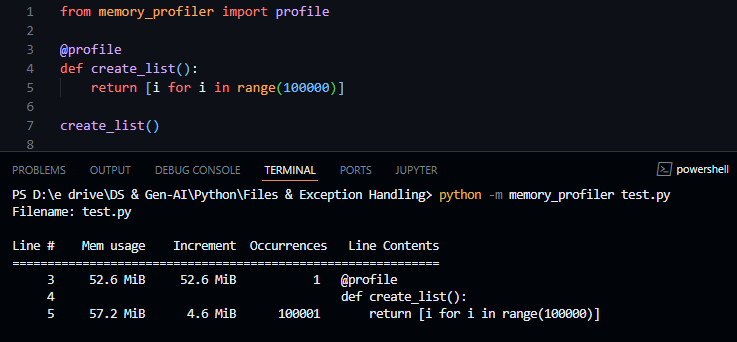

In [17]:
# 17. Write a Python program to create and write a list of numbers to a file, one number per line. 
numbers = [1, 2, 3, 4, 5]

with open("numbers.txt", "w") as file:
    for number in numbers:
        file.write(f"{number}\n")

In [26]:
# 18. How would you implement a basic logging setup that logs to a file with rotation after 1MB? 
import logging
from logging.handlers import RotatingFileHandler

# Create a logger
logger = logging.getLogger("my_logger")
logger.setLevel(logging.DEBUG)  # Set the logging level

# Create a RotatingFileHandler
handler = RotatingFileHandler(
    "app.log",            # Log file name
    maxBytes=1_000_000,   # 1MB = 1,000,000 bytes
    backupCount=3         # Keep up to 3 backup log files
)

# Create a logging format
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Add the handler to the logger
logger.addHandler(handler)

# Example usage
for i in range(10000):
    logger.info(f"This is log message number {i}")

In [19]:
# 19. Write a program that handles both IndexError and KeyError using a try-except block. 
my_list = [1, 2, 3]
my_dict = {"a": 10}

try:
    print(my_list[5])
    print(my_dict["b"])
except IndexError:
    print("IndexError: List index out of range.")
except KeyError:
    print("KeyError: Dictionary key not found.")

IndexError: List index out of range.


In [20]:
# 20. How would you open a file and read its contents using a context manager in Python?
with open("example.txt", "r") as file:
    content = file.read()
    print(content)

Hello!
This is a string written to the file.
This is an appended line.


In [25]:
# 21. Write a Python program that reads a file and prints the number of occurrences of a specific word.
def count_word(filename, word):
    try:
        with open(filename, 'r') as file:
            content = file.read()
            count = content.lower().count(word.lower())
            print(f"The word '{word}' occurred {count} times.")
    except FileNotFoundError:
        print("File not found.")

count_word("example.txt", "This")

The word 'This' occurred 2 times.


In [22]:
# 22. How can you check if a file is empty before attempting to read its contents? 
import os

filename = "example.txt"

if os.path.exists(filename):
    if os.path.getsize(filename) == 0:
        print("The file is empty.")
    else:
        with open(filename, 'r') as file:
            print(file.read())
else:
    print("File does not exist.")

Hello!
This is a string written to the file.
This is an appended line.


In [27]:
# 23. Write a Python program that writes to a log file when an error occurs during file handling.
import logging

logging.basicConfig(filename='file_errors.log', level=logging.ERROR)

try:
    with open("nonexistent.txt", 'r') as file:
        data = file.read()
except Exception as e:
    logging.error(f"Error occurred: {e}")